Importing packages

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from scipy.stats import skew
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings(action="ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import Data

In [ ]:
# 讀取資料
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [ ]:
# 讀取train前五行資料
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#讀取test前五行資料
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
print('The shape of df_train:', df_train.shape)
print('The shape.of df_test:', df_test.shape)

The shape of df_train: (1460, 81)
The shape.of df_test: (1459, 80)


In [ ]:
train_ID = df_train['Id']
test_ID = df_test['Id']

df_trainDropId = df_train.drop('Id', axis=1)
df_testDropId = df_test.drop('Id', axis=1)

EDA

Text(0.5, 0, "Hourse's sale price")

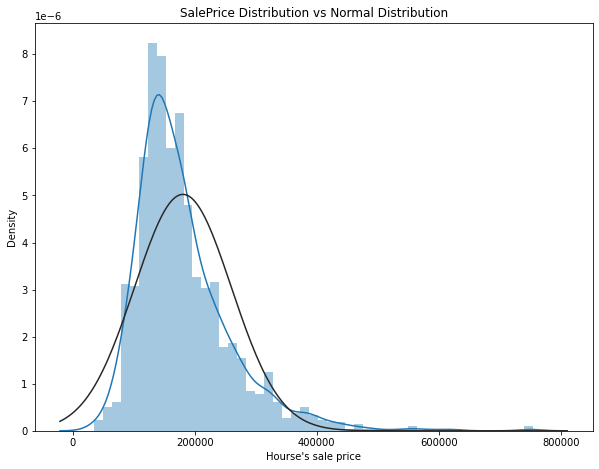

In [ ]:
# SalePrice分佈與常態分佈
mu, sigma = norm.fit(df_trainDropId['SalePrice'])
fig, ax = plt.subplots(figsize=(10, 7.5))
sns.distplot(df_trainDropId['SalePrice'], kde=True, hist=True,fit=norm)
plt.title('SalePrice Distribution vs Normal Distribution')
plt.xlabel("Hourse's sale price")

Heat Map 特徵關聯分析

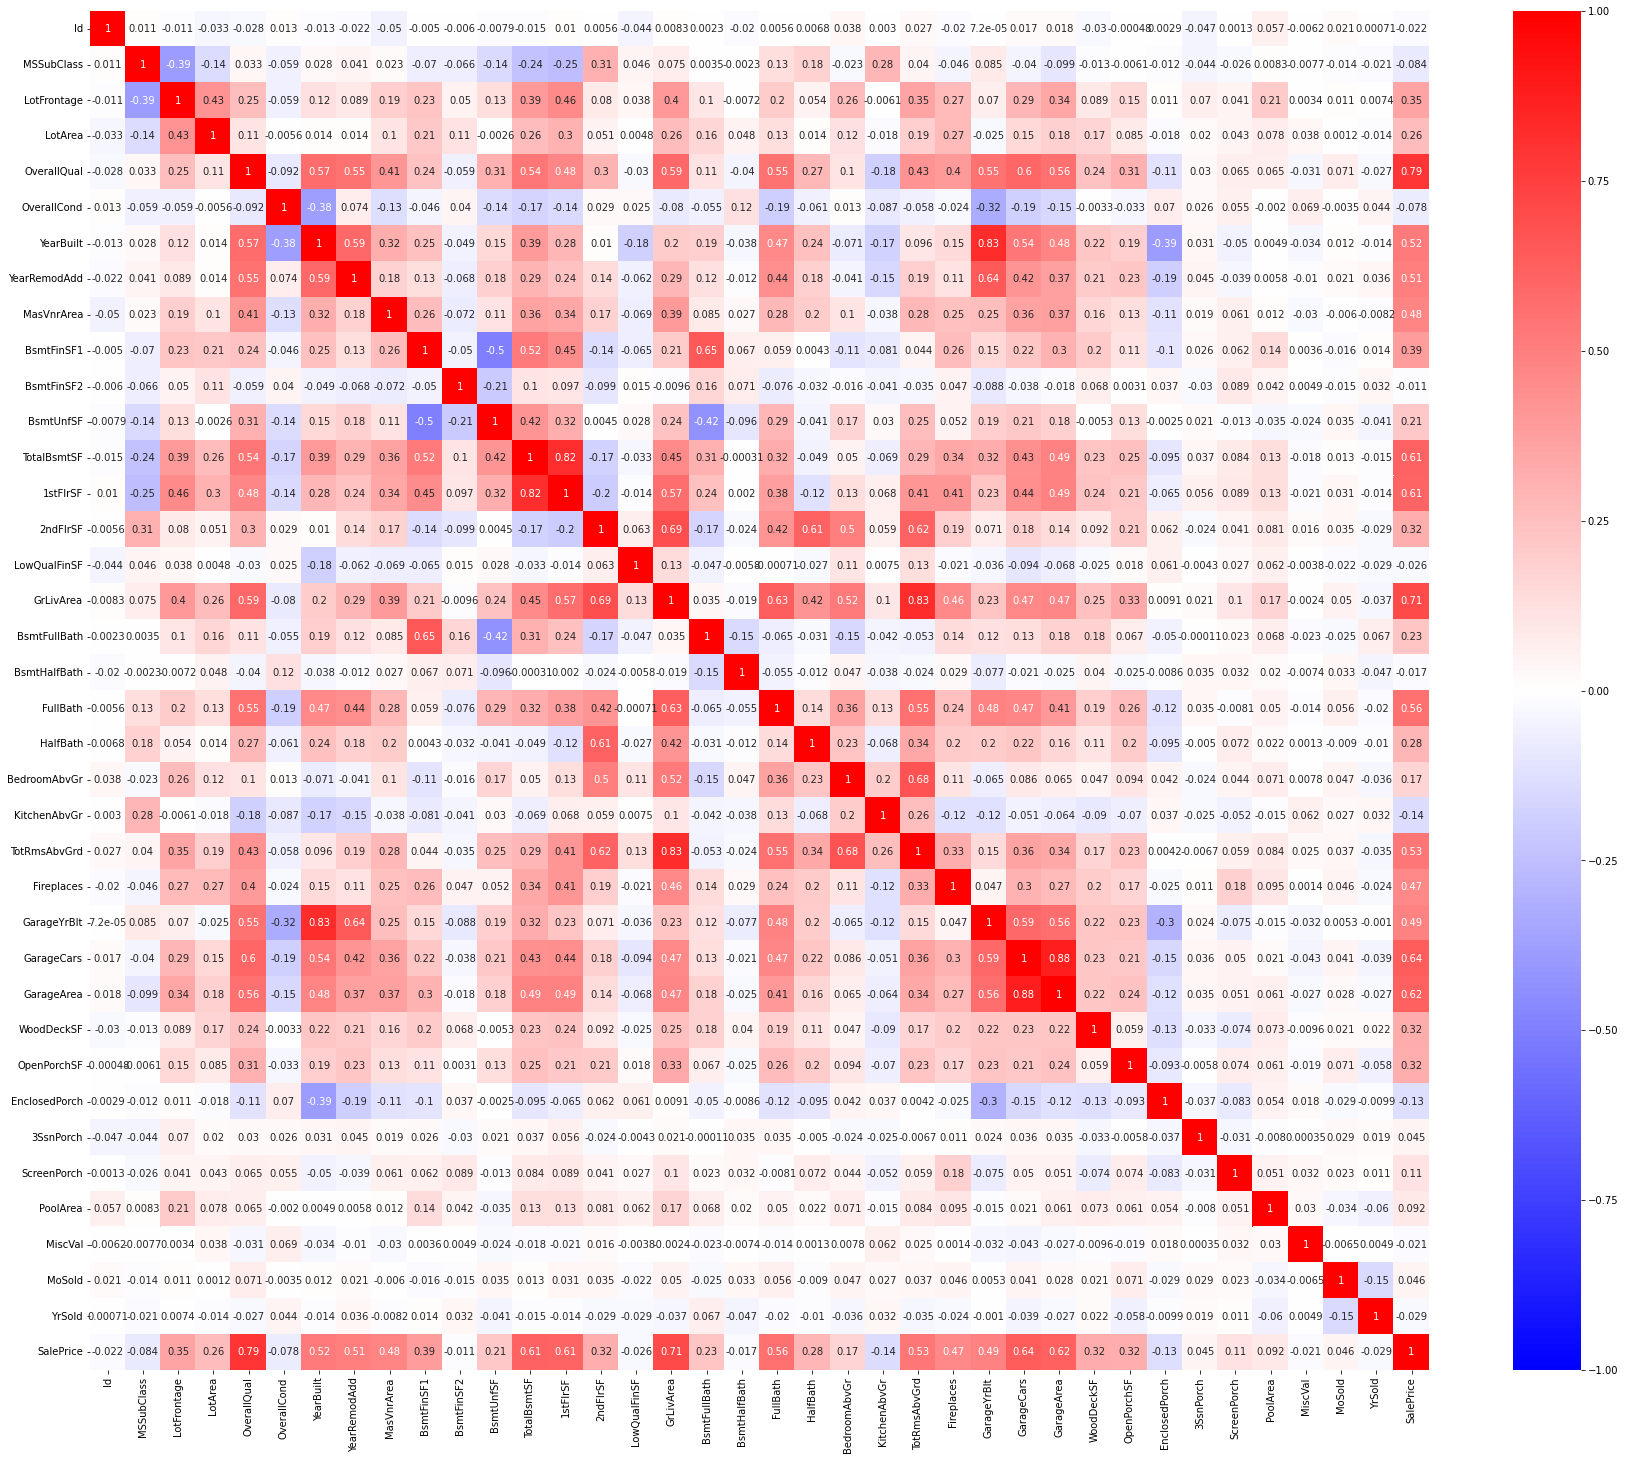

In [ ]:
fig, ax = plt.subplots(figsize=(30, 25))
# Pearson product-moment correlation coefficient 皮爾森積動差相關係數, 又稱作 PPMCC或PCCs,用於度量兩個變數X和Y之間的相關程度（線性相依），其值介於-1與1之間，只針對trainData數值部分做相依性
mat = df_train.corr('pearson') 
sns.heatmap(mat , center=0 ,vmin=-1,vmax=1,annot=True, cmap='bwr')
plt.show()

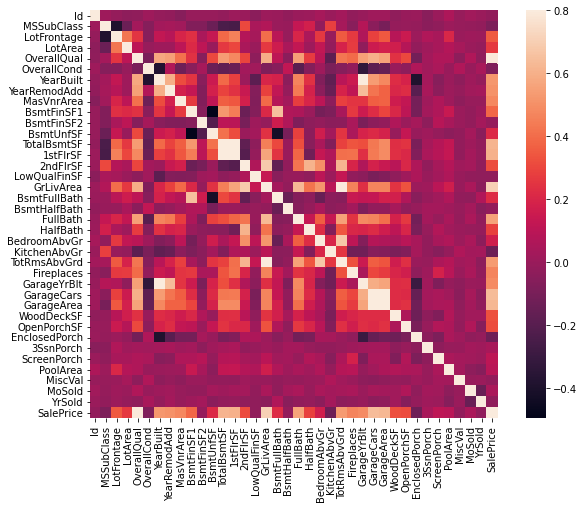

In [ ]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(10, 7.5))
sns.heatmap(corrmat, vmax=.8, square=True)

找出相關聯並且研究

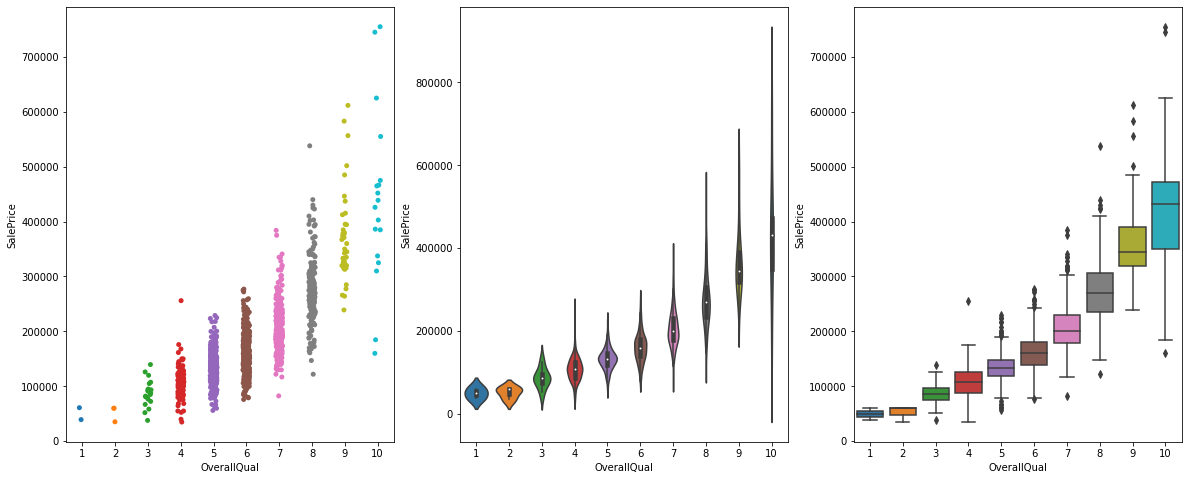

In [ ]:
# OverallQual: Rates the overall material and finish of the house(0~10個等級)
# OverallQual 與價格關係
fig, ax = plt.subplots(1, 3, figsize = (20,8))
sns.stripplot(data=df_train, x = 'OverallQual', y='SalePrice', ax = ax[0])
sns.violinplot(data=df_train, x = 'OverallQual', y='SalePrice', ax = ax[1])
sns.boxplot(data=df_train, x = 'OverallQual', y='SalePrice', ax = ax[2])
plt.show()

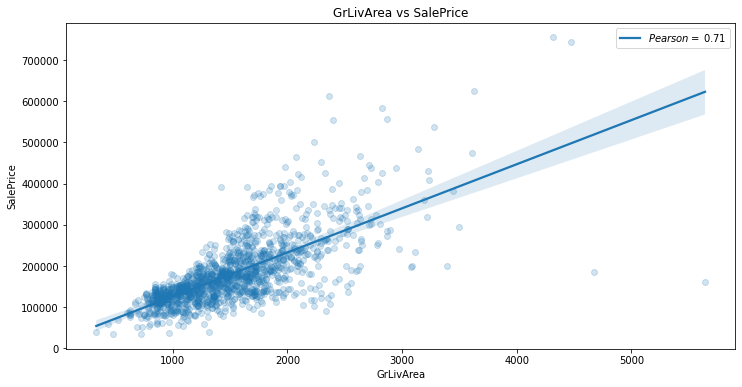

In [ ]:
# GrLivArea vs SalePrice [corr = 0.71]
# GrLivArea: Above grade (ground) living area square feet

Pearson_GrLiv = 0.71
plt.figure(figsize = (12,6))
sns.regplot(data=df_train, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GrLivArea vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_GrLiv)], loc = 'best')
plt.show()

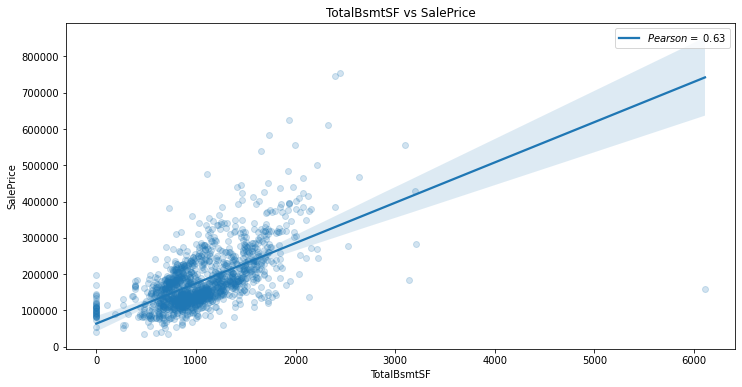

In [ ]:
# TotalBsmtSF  vs SalePrice
# TotalBsmtSF: Total square feet of basement area
Pearson_TBSF = 0.63
plt.figure(figsize = (12,6))
sns.regplot(data=df_train, x = 'TotalBsmtSF', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('TotalBsmtSF vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_TBSF)], loc = 'best')
plt.show()

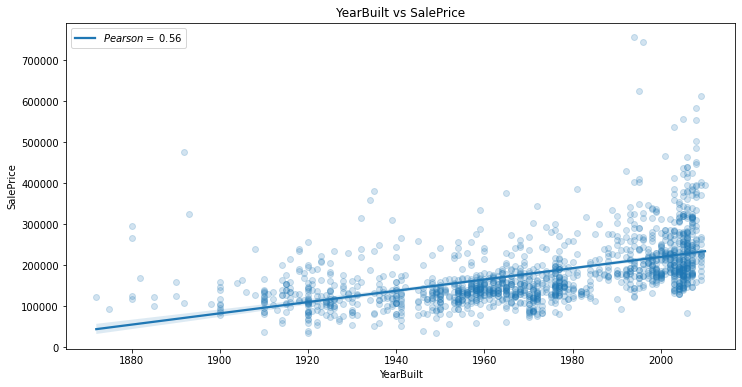

In [ ]:
# YearBuilt vs SalePrice

Pearson_YrBlt = 0.56
plt.figure(figsize = (12,6))
sns.regplot(data=df_train, x = 'YearBuilt', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('YearBuilt vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_YrBlt)], loc = 'best')
plt.show()

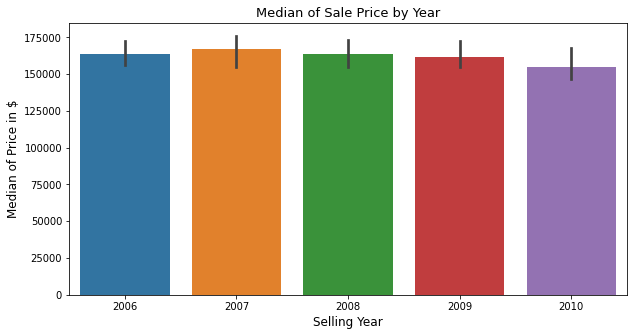

In [ ]:
# Median of Sale Price by Year

plt.figure(figsize = (10,5))
sns.barplot(x='YrSold', y="SalePrice", data = df_train, estimator = np.median)
plt.title('Median of Sale Price by Year', fontsize = 13)
plt.xlabel('Selling Year', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show()

分離Features和Target

In [ ]:
target = df_train['SalePrice']
testData_Id = df_test['Id']
testData2 = df_test.drop(['Id'], axis=1)
trainData2 = df_train.drop(['SalePrice'], axis=1)
train_test_Data = pd.concat([trainData2,testData2],axis=0, sort=False)

搜尋是否有NaN的值

In [ ]:
nan = pd.DataFrame(train_test_Data.isna().sum(), columns=['NaN_sum'])
nan['feat']=nan.index
nan['Perc(%)'] = (nan['NaN_sum']/1460)*100
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by = ['NaN_sum'])
nan['Usability'] = np.where(nan['Perc(%)'] > 20, 'Discard', 'Keep')
nan

,NaN_sum,feat,Perc(%),Usability
TotalBsmtSF,1,TotalBsmtSF,0.068493,Keep
GarageArea,1,GarageArea,0.068493,Keep
GarageCars,1,GarageCars,0.068493,Keep
KitchenQual,1,KitchenQual,0.068493,Keep
Electrical,1,Electrical,0.068493,Keep
BsmtUnfSF,1,BsmtUnfSF,0.068493,Keep
BsmtFinSF2,1,BsmtFinSF2,0.068493,Keep
BsmtFinSF1,1,BsmtFinSF1,0.068493,Keep
SaleType,1,SaleType,0.068493,Keep
Exterior2nd,1,Exterior2nd,0.068493,Keep


In [ ]:
# 將存儲為數字的"非數字預測變量"轉換為字符串
# # 將非數字預測之數值轉成字串
train_test_Data['MSSubClass'] = train_test_Data['MSSubClass'].apply(str)
train_test_Data['YrSold'] = train_test_Data['YrSold'].apply(str)
train_test_Data['MoSold'] = train_test_Data['MoSold'].apply(str)
train_test_Data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2.0,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3.0,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4.0,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5.0,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,NaN,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,NaN,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,NaN,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,NaN,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
# Filling Categorical NaN：補值NaN（由於描述文件，我們知道如何補值）
# fillna()
# mode()


# Functional: Home functionality (Assume typical unless deductions are warranted)
train_test_Data['Functional'] = train_test_Data['Functional'].fillna('Typ')
# Electrical: Electrical system
train_test_Data['Electrical'] = train_test_Data['Electrical'].fillna('SBrkr')
# KitchenQual: Kitchen quality
train_test_Data['KitchenQual'] = train_test_Data['KitchenQual'].fillna("TA")
# Exterior1st: Exterior covering on house
train_test_Data['Exterior1st'] = train_test_Data['Exterior1st'].fillna(train_test_Data['Exterior1st'].mode()[0])
# Exterior2nd: Exterior covering on house (if more than one material)
train_test_Data['Exterior2nd'] = train_test_Data['Exterior2nd'].fillna(train_test_Data['Exterior2nd'].mode()[0])
# SaleType: Type of sale
train_test_Data['SaleType'] = train_test_Data['SaleType'].fillna(train_test_Data['SaleType'].mode()[0])
# PoolQC: Pool quality
train_test_Data['PoolQC'] = train_test_Data['PoolQC'].fillna('None')
# Alley: Type of alley access to property
train_test_Data['Alley'] = train_test_Data['Alley'].fillna('None')
# FireplaceQu: Fireplace quality
train_test_Data['FireplaceQu'] = train_test_Data['FireplaceQu'].fillna('None')
# Fence: Fence quality
train_test_Data['Fence'] = train_test_Data['Fence'].fillna('None')
# MiscFeature: Miscellaneous feature not covered in other categories
train_test_Data['MiscFeature'] = train_test_Data['MiscFeature'].fillna('None')


for col in ('GarageArea', 'GarageCars'):
    train_test_Data[col] = train_test_Data[col].fillna(0)

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train_test_Data[col] = train_test_Data[col].fillna('None')
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_test_Data[col] = train_test_Data[col].fillna('None')
    
# Checking the features with NaN remained out

for col in train_test_Data:
    if train_test_Data[col].isna().sum() > 0:
        print(train_test_Data[col][0])

0    1.0
0    NaN
Name: Id, dtype: float64
0    RL
0    RH
Name: MSZoning, dtype: object
0    65.0
0    80.0
Name: LotFrontage, dtype: float64
0    AllPub
0    AllPub
Name: Utilities, dtype: object
0    BrkFace
0       None
Name: MasVnrType, dtype: object
0    196.0
0      0.0
Name: MasVnrArea, dtype: float64
0    706.0
0    468.0
Name: BsmtFinSF1, dtype: float64
0      0.0
0    144.0
Name: BsmtFinSF2, dtype: float64
0    150.0
0    270.0
Name: BsmtUnfSF, dtype: float64
0    856.0
0    882.0
Name: TotalBsmtSF, dtype: float64
0    1.0
0    0.0
Name: BsmtFullBath, dtype: float64
0    0.0
0    0.0
Name: BsmtHalfBath, dtype: float64
0    2003.0
0    1961.0
Name: GarageYrBlt, dtype: float64


In [ ]:
# 刪除無用處變量
useless = ['GarageYrBlt','YearRemodAdd']
train_test_Data = train_test_Data.drop(useless, axis = 1)

In [ ]:
# Imputing with KnnRegressor (可以使用不同的Imputers)

def import_knn(df):
    ttn = train_test_Data.select_dtypes(include=[np.number])
    ttc = train_test_Data.select_dtypes(exclude=[np.number])

    cols_nan = ttn.columns[ttn.isna().any()].tolist()         # columns w/ nan 
    cols_no_nan = ttn.columns.difference(cols_nan).values     # columns w/n nan

    for col in cols_nan:
        imp_test = ttn[ttn[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ttn.dropna()          # all indicies which which have no missing data 
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ttn.loc[ttn[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
    
    return pd.concat([ttn,ttc],axis=1)

In [ ]:
train_test_Data = import_knn(train_test_Data)

objects = []
for i in train_test_Data.columns:
    if train_test_Data[i].dtype == object:
        objects.append(i)
train_test_Data.update(train_test_Data[objects].fillna('None'))

# Checking NaN presence

for col in train_test_Data:
    if train_test_Data[col].isna().sum() > 0:
        print(train_test_Data[col][0])

In [ ]:
# 增加自定義Feature
train_test_Data["SqFtPerRoom"] = train_test_Data["GrLivArea"] / (train_test_Data["TotRmsAbvGrd"] +
                                                       train_test_Data["FullBath"] +
                                                       train_test_Data["HalfBath"] +
                                                       train_test_Data["KitchenAbvGr"])

train_test_Data['Total_Home_Quality'] = train_test_Data['OverallQual'] + train_test_Data['OverallCond']

train_test_Data['Total_Bathrooms'] = (train_test_Data['FullBath'] + (0.5 * train_test_Data['HalfBath']) +
                               train_test_Data['BsmtFullBath'] + (0.5 * train_test_Data['BsmtHalfBath']))

train_test_Data["HighQualSF"] = train_test_Data["1stFlrSF"] + train_test_Data["2ndFlrSF"]

# Creating dummy variables from categorical features

train_test_dummy = pd.get_dummies(train_test_Data)

# Fetch all numeric features
numeric_features = train_test_dummy.dtypes[train_test_dummy.dtypes != object].index
skewed_features = train_test_dummy[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False) #看不懂
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

# Normalize skewed features using log_transformation
for i in skew_index:
    train_test_dummy[i] = np.log1p(train_test_dummy[i])

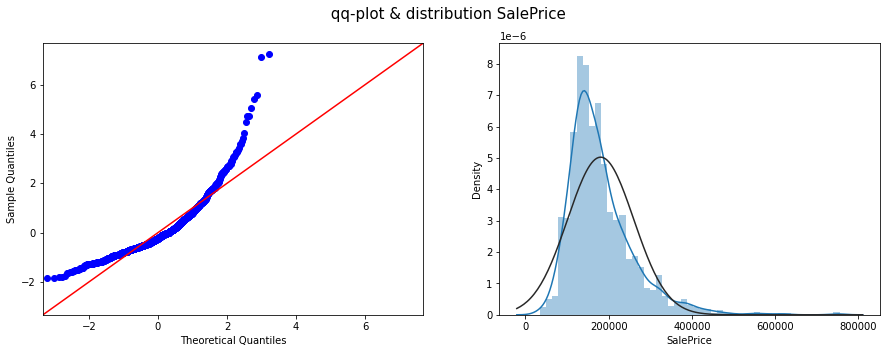

In [ ]:
# SalePrice before transformation

fig, ax =plt.subplots(1, 2, figsize = (15, 5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)
sm.qqplot(target, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])

sns.distplot(target, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

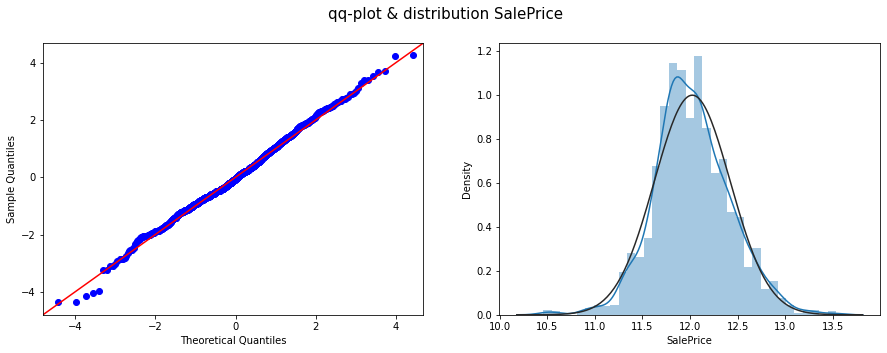

In [ ]:
# SalePrice after transformation

target_log = np.log1p(target)

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(target_log, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(target_log, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

建立模型

In [69]:
pip install catboost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [70]:
import xgboost as xgb
from sklearn.svm import SVR
from catboost import Pool
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [ ]:
# Train Test Data分離

train = train_test_dummy[0:1460]
testData2 = train_test_dummy[1460:]
testData2['Id'] = testData_Id


# Creation of the RMSE metric:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train, target_log, scoring='neg_mean_squared_error', cv=kf))
    return (rmse)

In [ ]:
# 10 Fold Cross validation

kf = KFold(n_splits=10, random_state= 42, shuffle=True)

cv_scores=[]
cv_std = []
baseline_models = ['Linear_Reg.','Bayesian_Ridge_Reg.','LGBM_Reg.','SVR',
                   'Dec_Tree_Reg.','Random_Forest_Reg.', 'XGB_Reg.',
                   'Grad_Boost_Reg.','Cat_Boost_Reg.','Stacked_Reg.']
target.shape

(1460,)

In [ ]:
# Linear Regression
lreg = LinearRegression()
score_lreg = cv_rmse(lreg)
cv_scores.append(score_lreg.mean())
cv_std.append(score_lreg.std())

In [ ]:
# Bayesian Ridge Regression

brr = BayesianRidge(compute_score=True)
score_brr = cv_rmse(brr)
cv_scores.append(score_brr.mean())
cv_std.append(score_brr.std())

In [ ]:
# Light Gradient Boost Regressor

l_gbm = LGBMRegressor(objective='regression')
score_l_gbm = cv_rmse(l_gbm)
cv_scores.append(score_l_gbm.mean())
cv_std.append(score_l_gbm.std())

In [ ]:
# Support Vector Regression

svr = SVR()
score_svr = cv_rmse(svr)
cv_scores.append(score_svr.mean())
cv_std.append(score_svr.std())

In [ ]:
# Decision Tree Regressor

dtr = DecisionTreeRegressor()
score_dtr = cv_rmse(dtr)
cv_scores.append(score_dtr.mean())
cv_std.append(score_dtr.std())

In [ ]:
# Random Forest Regressor

rfr = RandomForestRegressor()
score_rfr = cv_rmse(rfr)
cv_scores.append(score_rfr.mean())
cv_std.append(score_rfr.std())

In [ ]:
# XGB Regressor

xgb = xgb.XGBRegressor()
score_xgb = cv_rmse(xgb)
cv_scores.append(score_xgb.mean())
cv_std.append(score_xgb.std())

[07:38:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:38:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:38:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:38:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:38:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:38:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:38:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:38:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
# Gradient Boost Regressor

gbr = GradientBoostingRegressor()
score_gbr = cv_rmse(gbr)
cv_scores.append(score_gbr.mean())
cv_std.append(score_gbr.std())

In [ ]:
# Cat Boost Regressor

catb = CatBoostRegressor()
score_catb = cv_rmse(catb)
cv_scores.append(score_catb.mean())
cv_std.append(score_catb.std())

In [ ]:
# Stacked Regressor

stack_gen = StackingRegressor(regressors=(CatBoostRegressor(),
                                          LinearRegression(),
                                          BayesianRidge(),
                                          GradientBoostingRegressor()),
                              meta_regressor = CatBoostRegressor(),
                              use_features_in_secondary = True)

score_stack_gen = cv_rmse(stack_gen)
cv_scores.append(score_stack_gen.mean())
cv_std.append(score_stack_gen.std())

In [ ]:
final_cv_score = pd.DataFrame(baseline_models, columns = ['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
final_cv_score['RMSE_std'] = cv_std

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(final_cv_score['Regressors'],final_cv_score['RMSE_mean'])
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('CV_Mean_RMSE', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Train-Test split the data

X_train,X_test,y_train,y_test = train_test_split(train,target_log,test_size = 0.1,random_state=42)

# Cat Boost Regressor

cat = CatBoostRegressor()
cat_model = cat.fit(X_train,y_train,
                     eval_set = (X_test,y_test),
                     plot=True,
                     verbose = 0)

In [ ]:
cat_pred = cat_model.predict(X_test)
cat_score = rmse(y_test, cat_pred)
cat_score

In [ ]:
# Features的重要性

feat_imp = cat_model.get_feature_importance(prettified=True)
feat_imp

In [ ]:
# Plotting top 20 features' importance
plt.figure(figsize = (12,8))
sns.barplot(feat_imp['Importances'][:20],feat_imp['Feature Id'][:20], orient = 'h')
plt.show()

In [ ]:
# Feature importance Interactive Plot 
train_pool = Pool(X_train)
val_pool = Pool(X_test)

explainer = shap.TreeExplainer(cat_model) # insert your model
shap_values = explainer.shap_values(train_pool) # insert your train Pool object

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:200,:], X_train.iloc[:200,:])

# The plot represents just a slice of the Training data (200 observations)

In [ ]:
shap.summary_plot(shap_values, X_train)

In [ ]:
# Features' Interactions

train_data = Pool(X_train)

interaction = cat_model.get_feature_importance(train_data, type="Interaction")
column_names = X_train.columns.values 
interaction = pd.DataFrame(interaction, columns=["feature1", "feature2", "importance"])
interaction.feature1 = interaction.feature1.apply(lambda l: column_names[int(l)])
interaction.feature2 = interaction.feature2.apply(lambda l: column_names[int(l)])
interaction.head(20)

In [ ]:
# Catboost default paramters

cat_model.get_all_params()

Hyperparameter Optimization 超參數優化

In [ ]:
# 可以調整'iterations': [1000,6000]-->跑30min
grid = {'iterations': [1000,6000],
        'learning_rate': [0.05, 0.005, 0.0005],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 9]}

final_model = CatBoostRegressor()
randomized_search_result = final_model.randomized_search(grid,
                                                   X = X_train,
                                                   y= y_train,
                                                   verbose = False,
                                                   plot=False)

In [ ]:
# Final Cat-Boost Regressor

params = {'iterations': 6000,
          'learning_rate': 0.005,
          'depth': 4,
          'l2_leaf_reg': 1,
          'eval_metric':'RMSE',
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': 42}
        
cat_f = CatBoostRegressor(**params)
cat_model_f = cat_f.fit(X_train,y_train,
                     eval_set = (X_test,y_test),
                     plot=True,
                     verbose = False)

catf_pred = cat_model_f.predict(X_test)
catf_score = rmse(y_test, catf_pred)

In [ ]:
catf_score

In [ ]:
# Test CSV Submission

test_pred = cat_f.predict(testData2)
submission = pd.DataFrame(testData_Id, columns = ['Id'])
test_pred = np.expm1(test_pred)
submission['SalePrice'] = test_pred 
submission.head()

In [ ]:
submission.shape

In [ ]:
# 存檔
submission.to_csv("result.csv", index = False, header = True)